<a href="https://colab.research.google.com/github/nanac0n/2024ML_Are_U_T/blob/main/Bert_10hours_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00


In [3]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 8.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, auc
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import torch
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
file_path = '/content/drive/MyDrive/adasyn.csv'
data = pd.read_csv(file_path)

# 열 이름 수정
data.columns = ['posts', 'type']

# 데이터 확인
print(data.head())
print(data.info())

# 결측치 제거
data = data.dropna(subset=['type'])

# 텍스트 데이터와 레이블 분리
texts = data['posts']
labels = data['type']

# T와 F 유형으로 변환
labels = labels.apply(lambda x: 'T' if 'T' in x else 'F')

# Hugging Face 데이터셋으로 변환
dataset = Dataset.from_pandas(pd.DataFrame({'text': texts, 'label': labels.map({'T': 1, 'F': 0})}))

# 데이터셋 분할
train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# 토크나이저 및 모델 초기화
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

                                               posts type
0  know tool use interaction people excuse antiso...    T
1  rap music ehh opp yeah know valid well know fa...    T
2  preferably hd low except wew lad video mind go...    T
3  drink like wish could drink red wine give head...    T
4  space program ah bad deal meing freelance max ...    T
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156299 entries, 0 to 156298
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   156299 non-null  object
 1   type    156299 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB
None


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/125039 [00:00<?, ? examples/s]

Map:   0%|          | 0/31260 [00:00<?, ? examples/s]

In [5]:
!pip install transformers[torch]
!pip install accelerate -U

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.695200,0.692879
2,0.692900,0.692479
3,0.692400,0.691127


Accuracy: 0.5319257837492003
ROC AUC Score: 0.5
F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     16628
           1       0.00      0.00      0.00     14632

    accuracy                           0.53     31260
   macro avg       0.27      0.50      0.35     31260
weighted avg       0.28      0.53      0.37     31260

Specificity: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


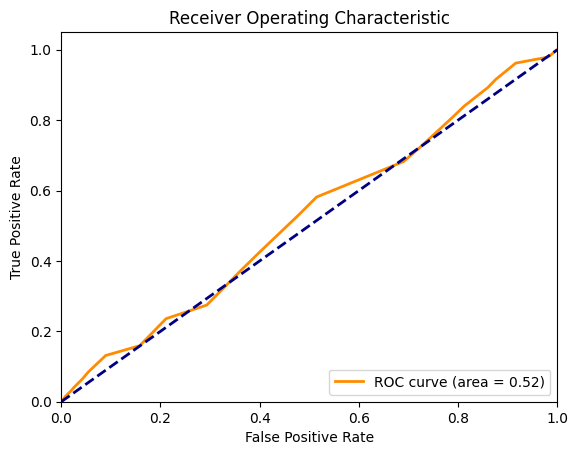

In [6]:
# 모델 학습
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
)

trainer.train()

# 모델 평가
predictions = trainer.predict(tokenized_test_dataset)
preds = predictions.predictions.argmax(-1)
y_test = test_dataset['label']

accuracy = accuracy_score(y_test, preds)
roc_auc = roc_auc_score(y_test, preds)
f1 = f1_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, preds))

# 특이도 계산
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print(f'Specificity: {specificity}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
# 추가된 부분: 업로드된 텍스트 파일을 통한 판별 과정

# 업로드된 텍스트 파일 경로
input_text_file_path = '/content/drive/MyDrive/output_english.txt'

# 텍스트 파일 읽기
with open(input_text_file_path, 'r') as file:
    input_text = file.read()

# 문장 단위로 나누기
sentences = input_text.split('.')

# 각 문장을 전처리 및 토큰화
preprocessed_sentences = [tokenizer(sentence, return_tensors='pt', padding='max_length', truncation=True) for sentence in sentences if sentence.strip()]

# 각 문장에 대해 예측 수행
model.eval()
predicted_types = []
with torch.no_grad():
    for sentence in preprocessed_sentences:
        # Move the input data to the GPU
        sentence = {k: v.to(model.device) for k, v in sentence.items()}
        outputs = model(**sentence)
        pred = torch.argmax(outputs.logits, dim=1).item()
        predicted_types.append('T' if pred == 1 else 'F')

# T와 F의 비율 계산
t_count = sum(1 for p in predicted_types if p == 'T')
f_count = sum(1 for p in predicted_types if p == 'F')
total = len(predicted_types)

t_percentage = (t_count / total) * 100
f_percentage = (f_count / total) * 100

# 비율 출력
print(f"Percentage of T: {t_percentage:.2f}%")
print(f"Percentage of F: {f_percentage:.2f}%")


Percentage of T: 0.00%
Percentage of F: 100.00%
